# Group by 

In [50]:
import pandas as pd

In [51]:
df = pd.read_csv("Group_by_data.csv")
print(df)

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
4   1/1/2017    mumbai           90          5   Sunny
5   1/2/2017    mumbai           85         12     Fog
6   1/3/2017    mumbai           87         15     Fog
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         20   Sunny
9   1/2/2017     paris           50         13  Cloudy
10  1/3/2017     paris           54          8  Cloudy
11  1/4/2017     paris           42         10  Cloudy


In [52]:
new_df = df.fillna(0)
new_df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


In [53]:
gf = df.groupby('city')
print(gf)

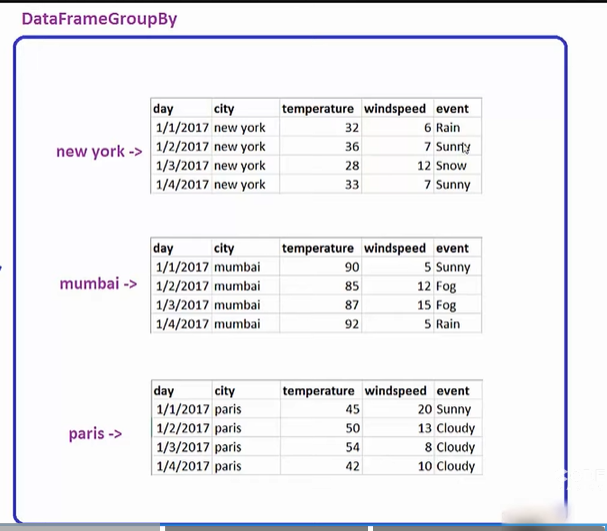

### gf is a group by object

| Variable  | Meaning                                                          |
| --------- | ---------------------------------------------------------------- |
| `city`    | the group key (group label), i.e., the name of the city          |
| `city_df` | the DataFrame subset containing only rows belonging to that city |

each iteration returns two things: city and city_df

In [54]:
for city,city_df in gf:
    print(city)
    

mumbai
new york
paris


In [55]:
for city,city_df in gf:
    print(city_df)

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


In [56]:
for city,city_df in gf:
    print(city)
    print(city_df)

mumbai
        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain
new york
        day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny
paris
         day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy


### access  a specific data frame 

In [57]:
gf = df.groupby('city')
gf.get_group('mumbai')

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


###  gf = df.groupby('city') is similar to SELECT * from Group_by_data GROUP BY city

In [58]:
gf.max()

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


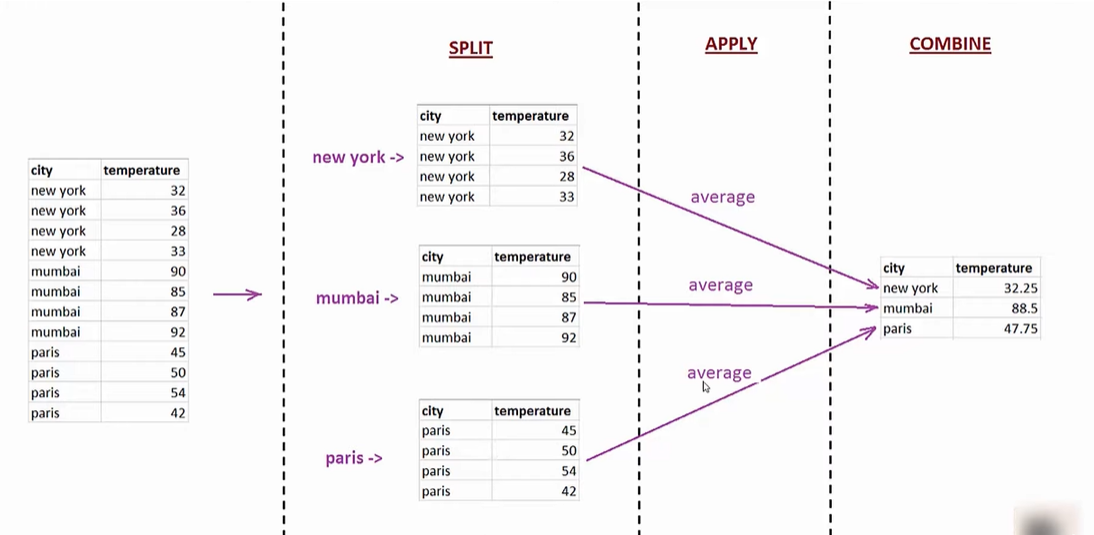

In [59]:
gf.mean(numeric_only=True)

,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


In [60]:
gf.max(numeric_only=True)

,temperature,windspeed
city,,
mumbai,92,15
new york,36,12
paris,54,20


In [61]:
gf.describe

<bound method GroupBy.describe of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x0000016D4EA4E990>>

In [62]:
gf.describe()


temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

city
mumbai      Axes(0.125,0.11;0.775x0.77)
new york    Axes(0.125,0.11;0.775x0.77)
paris       Axes(0.125,0.11;0.775x0.77)
dtype: object

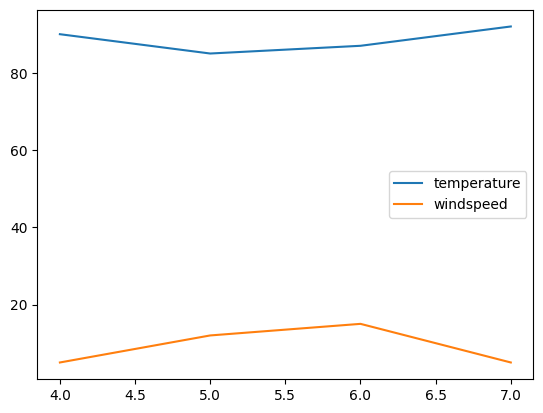

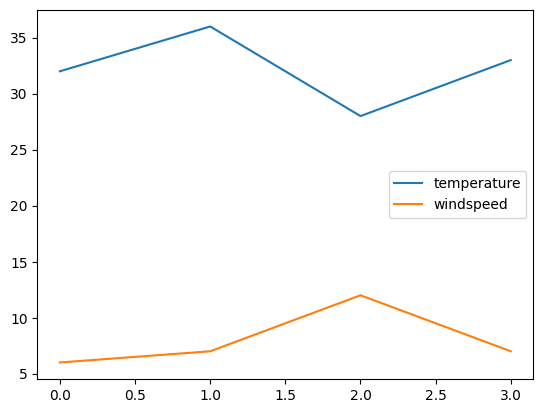

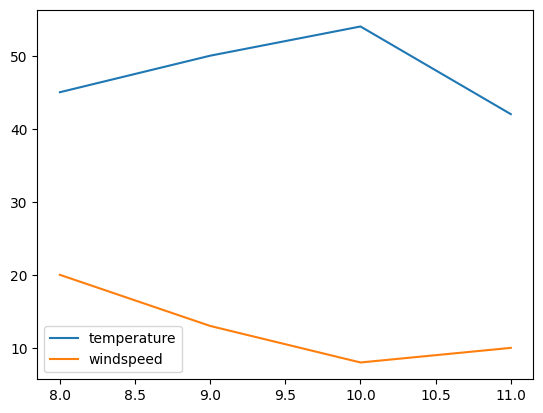

In [63]:
import matplotlib as mp
%matplotlib inline
gf.plot()